# 1. Hồi quy đơn biến

## 1.1. Tìm nghiệm bằng công thức tổng quát

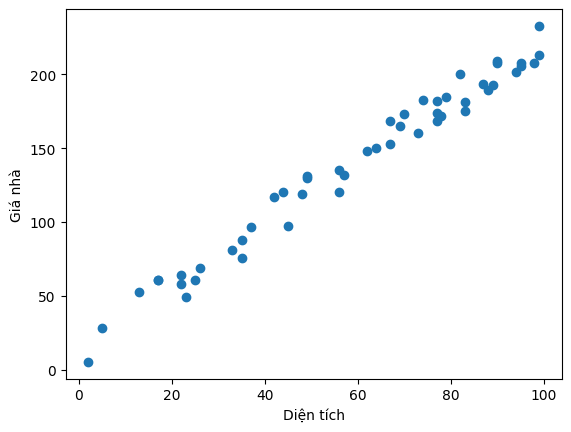

In [ ]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu
X = np.random.randint(2, 100, [50,1])
Y = 2.1*X + np.random.randint(1,30, [50,1])

# Hiển thị dữ liệu
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.scatter(X, Y)

__Công thức tổng quát $W = (X^T.X)^{-1}.X^T.Y$__

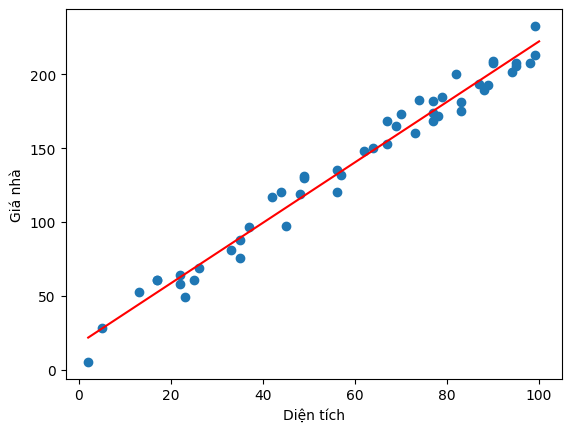

In [ ]:
# thêm vector cột 1 vào dữ liệu input
m = X.shape[0]
ones = np.ones((m,1), dtype=np.int8)
X_t = np.concatenate((ones,X), axis=1)

# tìm nghiệm W cho bài toán
W = np.linalg.inv(X_t.T.dot(X_t)).dot(X_t.T.dot(Y))
w0,w1 = W[0][0],W[1][0]

# lấy điểm đầu và điểm cuối 
# để vẽ đường thẳng cần tìm
x0 = np.linspace(2,100,2)
y0 = w0 + w1*x0

# visualize đường thẳng cần tìm
plt.scatter(X, Y)
plt.plot(x0,y0,'r')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.show()

__Nghiệm cần tìm__

In [ ]:
print(W)

[[17.59135239]
 [ 2.04852644]]


__Dự đoán__

x_pred =  [32]
y_pred =  [83.1441986]


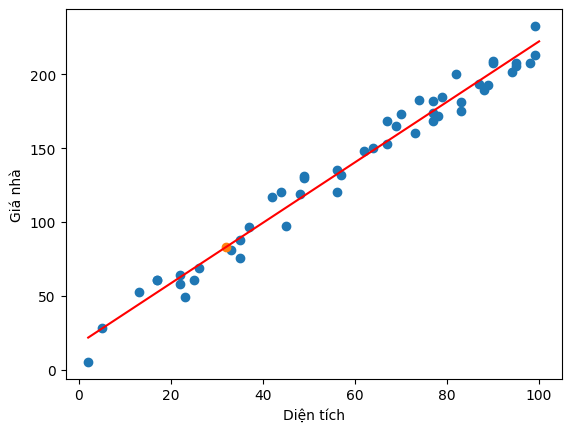

In [ ]:
# Tạo tạo một điểm mới và dự đoán
x_pred = np.random.randint(1, 150, [1,])
y_pred = w0 + w1*x_pred
print('x_pred = ', x_pred)
print('y_pred = ', y_pred)
# Visualize
plt.scatter(X, Y)
plt.scatter(x_pred, y_pred)
plt.plot(x0,y0,'r')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.show()

## 1.2. Tìm nghiệm bằng thư viện Sklearn

In [ ]:
# Import thư viện
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Khởi tạo model
lin_reg = LinearRegression()

# Fit/train model
lin_reg.fit(X, Y)

print('w1 = {}, w0 = {}'.format(lin_reg.coef_,lin_reg.intercept_))

w1 = [[2.04852644]], w0 = [17.59135239]


In [ ]:
y_pred = lin_reg.predict(x_pred.reshape(1,-1))
print('x_pred = ', x_pred)
print('y_pred = ', y_pred)

x_pred =  [32]
y_pred =  [[83.1441986]]


# 2. Hồi quy đa biến (N-1)

In [ ]:
# import thư viện
import pandas as pd

In [45]:
# load data
data = pd.read_csv('data.txt')
data.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
# Định nghĩa input và output
X = data[['Weight', 'Volume']]
y = data['CO2']

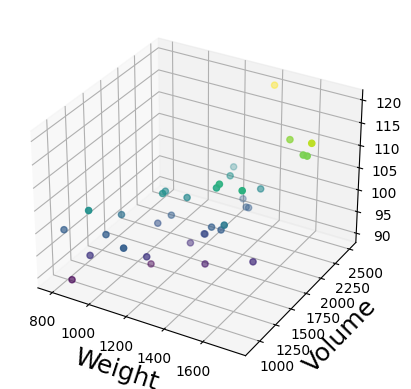

In [51]:
# create the figure
fig = plt.figure()

# add axes
ax = plt.axes(111,projection='3d')
ax.scatter3D(X.to_numpy()[:,0], X.to_numpy()[:,1], y.to_numpy(), c=y)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

In [ ]:
regr = LinearRegression()
regr.fit(X, y)

LinearRegression()

In [67]:
z = regr.predict(X)

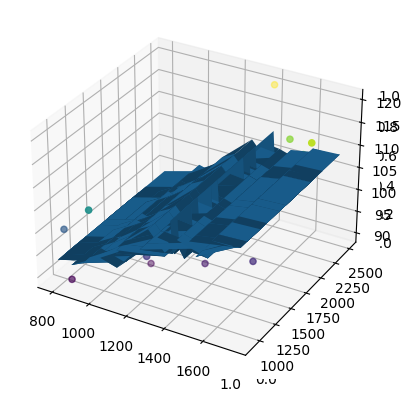

In [68]:
# create the figure
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X_, Y_ = np.meshgrid(X.to_numpy()[:,0],X.to_numpy()[:,1])

# add axes
ax = plt.axes(projection='3d')
ax.scatter3D(X.to_numpy()[:,0], X.to_numpy()[:,1], y.to_numpy(), c=y)
ax.plot_surface(X_, Y_, np.broadcast_to(z, X_.shape), alpha=1)
plt.show() 

In [ ]:
x_pred = [[2300, 1300]]
predictedCO2 = regr.predict(x_pred)

print(predictedCO2)

[107.2087328]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 3. Hồi quy đa biến với nhiều output (N-N)

In [76]:
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [79]:
X, y = load_linnerud(return_X_y=True)
print('Input shape: ', X.shape)
print('Output shape: ', y.shape)

Input shape:  (20, 3)
Output shape:  (20, 3)


In [77]:
regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)

In [78]:
regr.predict(X[[0]])

array([[176.16484296,  35.0548407 ,  57.09000136]])